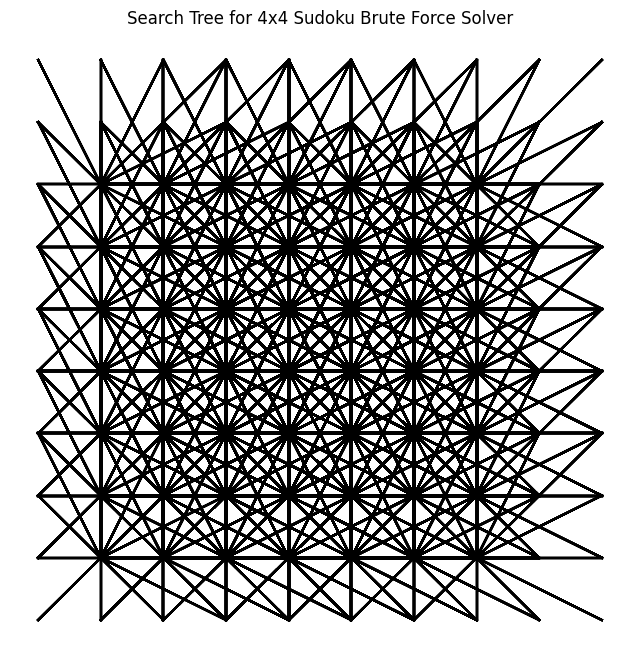

In [1]:
import matplotlib.pyplot as plt

def is_valid(puzzle, row, col, num):
    for i in range(4):
        if puzzle[row][i] == num or puzzle[i][col] == num:
            return False
    start_row, start_col = 2 * (row // 2), 2 * (col // 2)
    for i in range(2):
        for j in range(2):
            if puzzle[i + start_row][j + start_col] == num:
                return False
    return True

def solve_sudoku(puzzle, depth=0):
    for i in range(4):
        for j in range(4):
            if puzzle[i][j] == 0:
                for num in range(1, 5):
                    if is_valid(puzzle, i, j, num):
                        puzzle[i][j] = num
                        if solve_sudoku(puzzle, depth + 1):
                            return True
                        puzzle[i][j] = 0
                return False
    return True

def plot_search_tree(puzzle, depth, parent, position):
    if depth == 0:
        return

    for i in range(4):
        for j in range(4):
            plt.plot([parent[0], position[0]], [parent[1], position[1]], 'k-')
            plot_search_tree(puzzle, depth - 1, position, (position[0] + (i - 1), position[1] + (j - 1)))

# Example puzzle
puzzle = [
    [0, 2, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 3],
    [0, 0, 0, 0]
]

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Search Tree for 4x4 Sudoku Brute Force Solver')

# Starting node
plt.plot(0, 0, 'ko')
plot_search_tree(puzzle, 4, (0, 0), (0, 0))

plt.show()
